In [112]:
import pandas as pd
datamart_normalized = pd.read_csv('datamart_normalized_df.csv')
datamart_normalized.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12747,-2.002202,0.865157,1.464940
1,12748,-2.814518,3.815272,2.994692
2,12749,-1.789490,1.189117,1.347598
3,12820,-1.789490,0.546468,0.500595
4,12822,0.337315,0.020925,0.037943


In [113]:
df = df[['Recency', 'Frequency', 'MonetaryValue']]

In [114]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=1)

In [115]:
kmeans.fit(df.to_numpy())
cluster_labels = kmeans.labels_

In [116]:
datamart_rfm = pd.read_csv('datamart_rfm.csv')

In [117]:
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)

In [118]:
datamart_rfm_k3.head()

,CustomerID,Recency,Frequency,MonetaryValue,Cluster
0,12747,3,25,948.70,1
1,12748,1,888,7046.16,1
2,12749,4,37,813.45,1
3,12820,4,17,268.02,1
4,12822,71,9,146.15,2


In [119]:
grouped = datamart_rfm_k3.groupby(['Cluster'])

In [120]:
grouped.agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         164.8       3.1          53.5  1176
1          15.7      50.3        1059.3   889
2          77.1      12.6         219.2  1578

In [121]:
sse = {}
for k in range(1,21):
    kmeans = KMeans(n_clusters=k,random_state=1)
    kmeans.fit(df)
    sse[k] = kmeans.inertia_

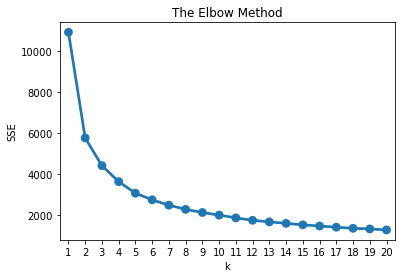

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

In [123]:
datamart_normalized

,CustomerID,Recency,Frequency,MonetaryValue
0,12747,-2.002202,0.865157,1.464940
1,12748,-2.814518,3.815272,2.994692
2,12749,-1.789490,1.189117,1.347598
3,12820,-1.789490,0.546468,0.500595
4,12822,0.337315,0.020925,0.037943
...,...,...,...,...
3638,18280,1.346554,-1.221955,-0.975812
3639,18281,1.029259,-1.221955,-1.125628
3640,18282,-1.276975,-1.221955,-1.152485
3641,18283,-1.789490,2.356706,0.866422


In [124]:
datamart_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12747,3,25,948.70
1,12748,1,888,7046.16
2,12749,4,37,813.45
3,12820,4,17,268.02
4,12822,71,9,146.15


In [125]:
datamart_normalized = pd.DataFrame(datamart_normalized, 
                                  index=datamart_rfm.index,
                                   columns= datamart_rfm.columns)

In [126]:
datamart_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12747,3,25,948.70
1,12748,1,888,7046.16
2,12749,4,37,813.45
3,12820,4,17,268.02
4,12822,71,9,146.15


In [127]:
datamart_normalized = datamart_normalized.assign(Cluster=cluster_labels)

In [128]:
datamart_normalized.head()

,CustomerID,Recency,Frequency,MonetaryValue,Cluster
0,12747,-2.002202,0.865157,1.464940,1
1,12748,-2.814518,3.815272,2.994692,1
2,12749,-1.789490,1.189117,1.347598,1
3,12820,-1.789490,0.546468,0.500595,1
4,12822,0.337315,0.020925,0.037943,2


In [147]:
datamart_melt = pd.melt(datamart_normalized.reset_index(),
                       id_vars=['CustomerID', 'Cluster'],
                       value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                       var_name='Metric',
                       value_name='Value')

In [148]:
datamart_melt

,CustomerID,Cluster,Metric,Value
0,12747,1,Recency,-2.002202
1,12748,1,Recency,-2.814518
2,12749,1,Recency,-1.789490
3,12820,1,Recency,-1.789490
4,12822,2,Recency,0.337315
...,...,...,...,...
10924,18280,0,MonetaryValue,-0.975812
10925,18281,0,MonetaryValue,-1.125628
10926,18282,0,MonetaryValue,-1.152485
10927,18283,1,MonetaryValue,0.866422


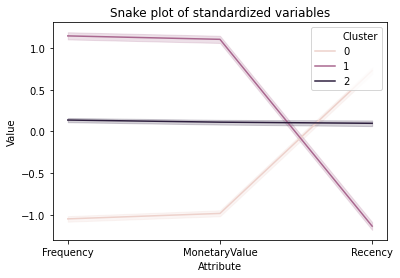

In [131]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x='Metric', y='Value', hue='Cluster', data=datamart_melt)

In [132]:
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean()

population_avg = datamart_rfm.mean()

relative_imp = cluster_avg / population_avg - 1

relative_imp.round(2)

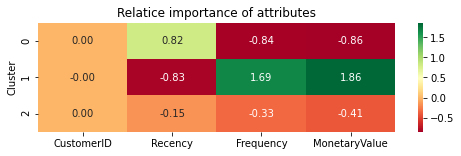

In [146]:
plt.figure(figsize =(8,2))
plt.title('Relatice importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [3]:
import pandas as pd
import numpy as np
datamart_rfmt = pd.read_csv('datamart_rfmt.csv')

In [4]:
# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Apply log transformation
datamart_rfmt_log = np.log(datamart_rfmt)

# Initialize StandardScaler and fit it 
scaler = StandardScaler(); scaler.fit(datamart_rfmt_log)

# Transform and store the scaled data as datamart_rfmt_normalized
datamart_rfmt_normalized = scaler.transform(datamart_rfmt_log)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


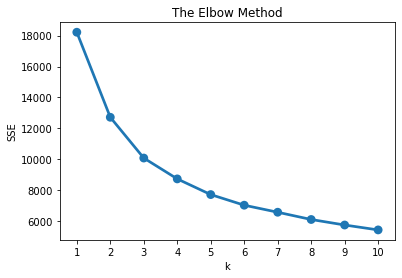

In [6]:
sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(datamart_rfmt_normalized)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_ 

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [7]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_rfmt_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [8]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfmt_k4 = datamart_rfmt.assign(Cluster=cluster_labels)

# Group by cluster
grouped = datamart_rfmt_k4.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0         168.6       6.2         104.9  227.7   920
1          26.4      42.9         887.6  274.6  1188
2          30.1       7.5         101.8   40.1   656
3         140.1       7.6         151.1  216.5   879

In [12]:
datamart_normalized = pd.DataFrame(data=datamart_rfmt_normalized, 
                                   index=datamart_rfmt.index, 
                                   columns=datamart_rfmt.columns)

In [14]:
datamart_normalized.head()

,CustomerID,Recency,Frequency,MonetaryValue,Tenure
0,-1.914291,-2.002202,0.865157,1.464940,0.919695
1,-1.913516,-2.814518,3.815272,2.994692,0.928750
2,-1.912742,-1.789490,1.189117,1.347598,0.342906
3,-1.857877,-1.789490,0.546468,0.500595,0.808122
4,-1.856336,0.337315,0.020925,0.037943,-0.632151


In [15]:
datamart_normalized = datamart_normalized.assign(Cluster=cluster_labels)

In [16]:
datamart_normalized.head()

,CustomerID,Recency,Frequency,MonetaryValue,Tenure,Cluster
0,-1.914291,-2.002202,0.865157,1.464940,0.919695,1
1,-1.913516,-2.814518,3.815272,2.994692,0.928750,1
2,-1.912742,-1.789490,1.189117,1.347598,0.342906,1
3,-1.857877,-1.789490,0.546468,0.500595,0.808122,1
4,-1.856336,0.337315,0.020925,0.037943,-0.632151,3


In [17]:
datamart_melt = pd.melt(datamart_normalized.reset_index(),
                       id_vars=['CustomerID', 'Cluster'],
                       value_vars=['Recency', 'Frequency', 'MonetaryValue', 'Tenure'],
                       var_name='Metric',
                       value_name='Value')

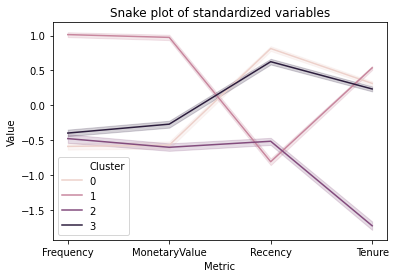

In [18]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x='Metric', y='Value', hue='Cluster', data=datamart_melt)

In [19]:
cluster_avg = datamart_rfmt_k4.groupby(['Cluster']).mean()

population_avg = datamart_rfmt.mean()

relative_imp = cluster_avg / population_avg - 1

relative_imp.round(2)

,CustomerID,Recency,Frequency,MonetaryValue,Tenure
Cluster,,,,,
0,0.08,0.86,-0.67,-0.72,0.10
1,0.01,-0.71,1.29,1.39,0.33
2,0.02,-0.67,-0.60,-0.73,-0.81
3,-0.10,0.55,-0.60,-0.59,0.05


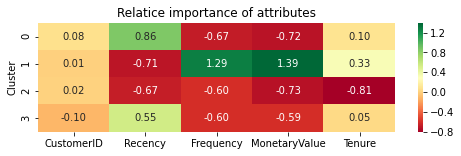

In [20]:
plt.figure(figsize =(8,2))
plt.title('Relatice importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [22]:
import pandas as pd
import numpy as np
datamart_rfmt = pd.read_csv('datamart_rfmt.csv')

In [26]:
# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Apply log transformation
datamart_rfmt_log = np.log(datamart_rfmt)

# Initialize StandardScaler and fit it 
scaler = StandardScaler(); scaler.fit(datamart_rfmt_log)

# Transform and store the scaled data as datamart_rfmt_normalized
X = scaler.transform(datamart_rfmt_log)


In [28]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(X)

# Extract cluster labels
cluster_labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(X)

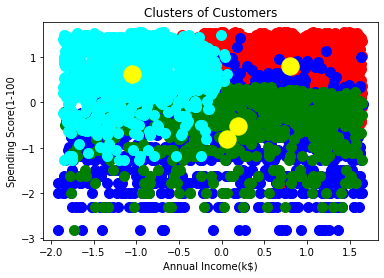

In [29]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()